# King Country Real Estate Pricing

## Import and data overview

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import boxcox
from scipy.stats import norm
import math
%matplotlib inline
pd.options.display.max_rows = 100
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import folium
from folium.plugins import HeatMap
import geopandas as gpd
from shapely.geometry import Point, Polygon
from descartes import PolygonPatch

from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import StandardScaler


from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from statsmodels.formula.api import ols
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from sklearn.model_selection import cross_val_score

In [2]:
def col_rename(df, dict_rules, ip=True):
    ''' rename columns in data frame using a dictionary of rules  '''
    if isinstance(df,pd.core.frame.DataFrame) and isinstance(dict_rules,dict):
        z = df.rename(columns = dict_rules, inplace=ip)
    else:
        raise TypeError
    return z
#
def print_unique(df,col):
    ''' gives a list of unique values in a field '''
    if isinstance(df,pd.core.frame.DataFrame) and isinstance(df[col],pd.core.frame.Series):
        z = df[col].unique()
    else:
        raise TypeError
    return z
#

In [3]:
df = pd.read_csv('kc_house_data.csv') # read the housing data
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

Check for nan values

In [5]:
df.isna().any()

id               False
date             False
price            False
bedrooms         False
bathrooms        False
sqft_living      False
sqft_lot         False
floors           False
waterfront       False
view             False
condition        False
grade            False
sqft_above       False
sqft_basement    False
yr_built         False
yr_renovated     False
zipcode          False
lat              False
long             False
sqft_living15    False
sqft_lot15       False
dtype: bool

In [6]:
df.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

Value counts for all columns

The label takes care of identifications so we can remove 'id'. We also chose to remove date sold and year renovated.

In [7]:
df.drop(labels=['id','date','yr_renovated'],axis=1,inplace=True) # drop

In [8]:

!pwd

/Users/antares/PycharmProjects/IH_MIDTERM/kingcounty


In [9]:
df['price'].mean()

540088.1417665294

## Price variation across region

In [10]:
# the most extreme .1% latitudes, &
# the most extreme .1% longitudes
df = df[(df['price'] >= np.percentile(df['price'], 0.5)) & (df['price'] <= np.percentile(df['price'], 99.5)) & (df['lat'] >= np.percentile(df['lat'], 0.05)) &  (df['lat'] < np.percentile(df['lat'], 99.95)) &(df['long'] >= np.percentile(df['long'], 0.05)) &(df['long'] <= np.percentile(df['long'], 99.95))]

In [11]:
df['price_sqft'] = df['price']/df['sqft_living']

/var/folders/lj/my6r3k650wl54v5nz5r6x5cm0000gn/T/ipykernel_54533/570009378.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['price_sqft'] = df['price']/df['sqft_living']


In [12]:
KCo_map = gpd.read_file('King_County_Political_Boundary_no_waterbodies__kingco_area.shp')
KCo_map.set_crs(epsg=4326, inplace=True)
#crs = {'init':'espc:4326'}
#crs=CRS("epsg:3857")
#KCo_map = KCo_map.to_crs(crs)
geometry = [Point(xy) for xy in zip(df['long'], df['lat'])]
geo_df = gpd.GeoDataFrame(df, geometry = geometry)


In [13]:
df.lat.min()-.01

47.174

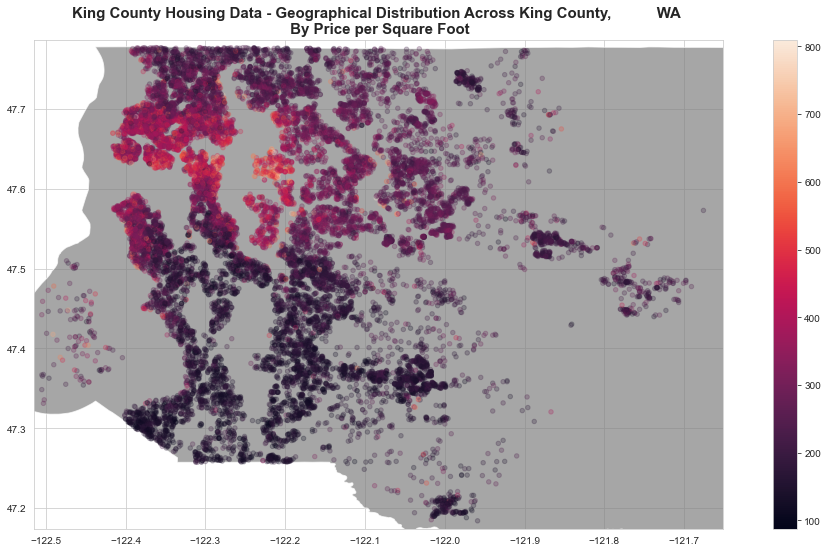

In [14]:
fig, ax = plt.subplots(figsize=(18,9))
KCo_map.plot(ax=ax, alpha=0.7,color='grey')
geo_df.plot(column=df['price_sqft'],ax=ax,alpha=0.25, legend=True,markersize=20)
plt.title('King County Housing Data - Geographical Distribution Across King County, \
          WA \n By Price per Square Foot', fontsize=15,fontweight='bold')
# set latitiude and longitude boundaries for map display
plt.xlim(df.long.min()-.01,df.long.max()-.25)
plt.ylim(df.lat.min()-.01, df.lat.max()+.01)

plt.show()

In [15]:
df_zbp = df.groupby('zipcode')['price'].agg('mean').reset_index()

In [16]:
df_zbp

,zipcode,price
0,98001,2.840966e+05
1,98002,2.379558e+05
2,98003,2.947067e+05
3,98004,1.223358e+06
4,98005,8.101649e+05
5,98006,8.294848e+05
6,98007,6.171051e+05
7,98008,5.990417e+05
8,98010,4.236660e+05
9,98011,4.903515e+05


In [17]:
N=round(df_zbp['price'].max() - df_zbp['price'].min(),0)
N = int(N)

In [18]:
bins = [int(N/(4-i)) for i in range(4)]
bins.insert(0,0)
bins

[0, 337922, 450563, 675845, 1351691]

In [19]:
df_zbp['binned'] = pd.cut(df_zbp['price'], bins)

In [20]:
df['price_sqft'].mean()

263.2391467227264

In [21]:
df_zbp

,zipcode,price,binned
0,98001,2.840966e+05,"(0.0, 337922.0]"
1,98002,2.379558e+05,"(0.0, 337922.0]"
2,98003,2.947067e+05,"(0.0, 337922.0]"
3,98004,1.223358e+06,"(675845.0, 1351691.0]"
4,98005,8.101649e+05,"(675845.0, 1351691.0]"
5,98006,8.294848e+05,"(675845.0, 1351691.0]"
6,98007,6.171051e+05,"(450563.0, 675845.0]"
7,98008,5.990417e+05,"(450563.0, 675845.0]"
8,98010,4.236660e+05,"(337922.0, 450563.0]"
9,98011,4.903515e+05,"(450563.0, 675845.0]"


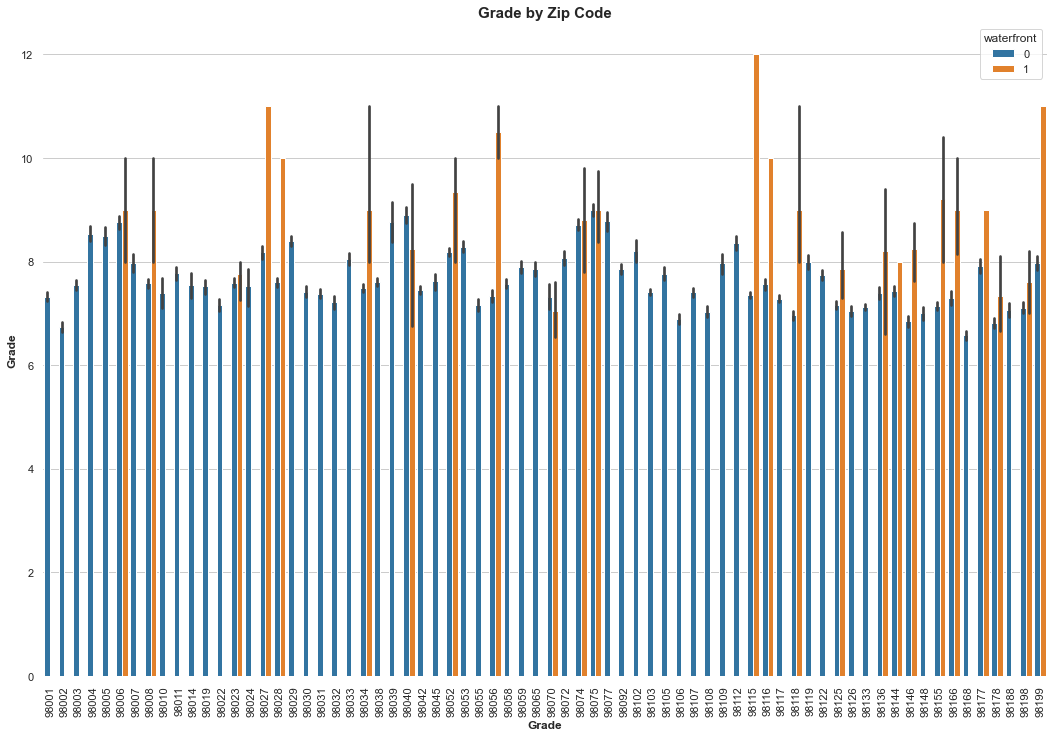

In [22]:
sns.set_style('whitegrid')
sns.set_context('notebook')
sns.color_palette("bright")

f, ax = plt.subplots(figsize=(18, 12))
sns.despine(f, left=True, bottom=True)
sns.barplot(x="zipcode", y="grade", data=df, ax=ax, hue='waterfront')
ax.set_title("Grade by Zip Code", fontsize=15,fontweight='bold')
ax.set_xlabel("Grade", fontsize=12,fontweight='bold')
ax.set_ylabel("Grade", fontsize=12,fontweight='bold')
plt.xticks(rotation=90)

plt.show()

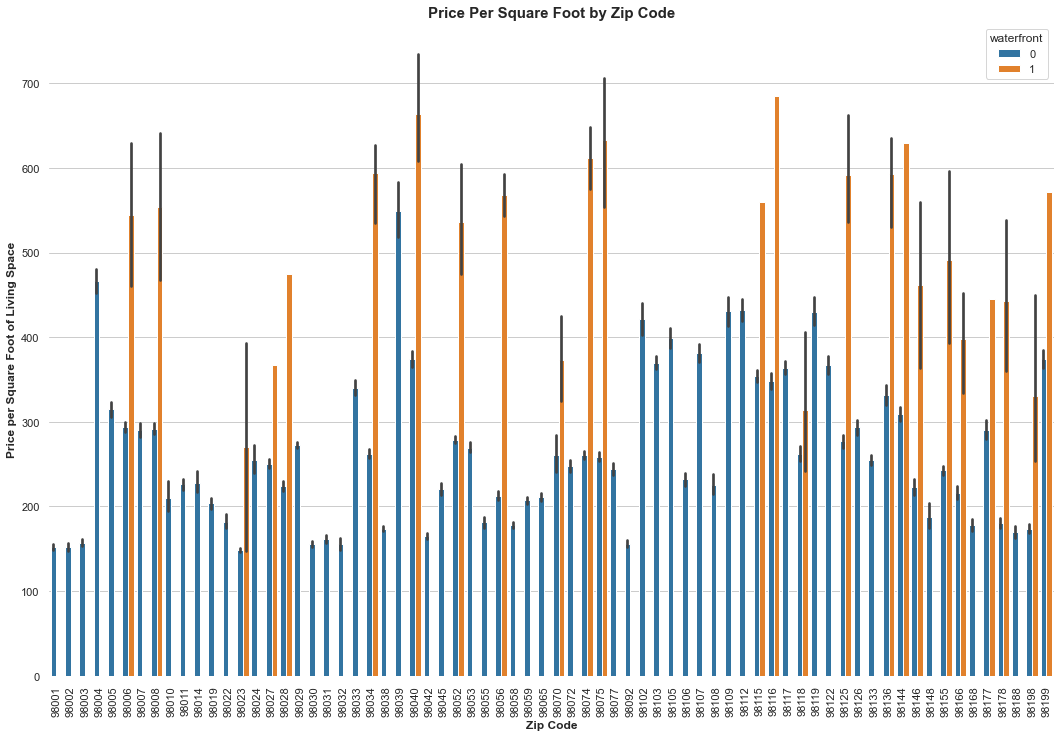

In [23]:
sns.set_style('whitegrid')
sns.set_context('notebook')
sns.color_palette("bright")

f, ax = plt.subplots(figsize=(18, 12))
sns.despine(f, left=True, bottom=True)
sns.barplot(x="zipcode", y="price_sqft", data=df, ax=ax, hue='waterfront')
ax.set_title("Price Per Square Foot by Zip Code", fontsize=15,fontweight='bold')
ax.set_xlabel("Zip Code", fontsize=12,fontweight='bold')
ax.set_ylabel("Price per Square Foot of Living Space", fontsize=12,fontweight='bold')
plt.xticks(rotation=90)

plt.show()

In [24]:
# find the row of the house which has the highest price
#maxpr=df.loc[df['price'].idxmax()]

# define a function to draw a basemap easily
def generateBaseMap(default_location=[47.5112, -122.257], default_zoom_start=9.4):
    base_map = folium.Map(location=default_location, control_scale=True, zoom_start=default_zoom_start)
    return base_map

df_copy = df.copy()
# select a zipcode for the heatmap
#set(df['zipcode'])
#df_copy = df[df['zipcode']].copy()
df_copy['count'] = 1
basemap = generateBaseMap()
# add carton position map
folium.TileLayer('cartodbpositron').add_to(basemap)
s=folium.FeatureGroup(name='icon').add_to(basemap)
# add a marker for the house which has the highest price
#folium.Marker([maxpr['lat'], maxpr['long']],popup='Highest Price: $'+str(format(maxpr['price'],'.0f')),
 #             icon=folium.Icon(color='green')).add_to(s)
# add heatmap
HeatMap(data=df_copy[['lat','long','count']].groupby(['lat','long']).sum().reset_index().values.tolist(),
        radius=8,max_zoom=13,name='Heat Map').add_to(basemap)
folium.LayerControl(collapsed=False).add_to(basemap)
basemap

In [25]:
df.drop(columns = ['lat', 'long', 'geometry', 'price_sqft'], inplace = True)


/var/folders/lj/my6r3k650wl54v5nz5r6x5cm0000gn/T/ipykernel_54533/1480812183.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns = ['lat', 'long', 'geometry', 'price_sqft'], inplace = True)


## Correlations and statistics

In [26]:
for col in df.columns:  
    print(col, '\n', pd.concat([df[col].value_counts(normalize=True).head(20),
                                df[col].value_counts().head(20)],axis=1,keys=('fractional %','count')),
    '\n Min:', df[col].min(), '  Max:', df[col].max(), 
    'Unique Values:', df[col].nunique(),'\n')

price 
           fractional %  count
450000.0      0.008056    172
350000.0      0.007962    170
550000.0      0.007400    158
500000.0      0.007119    152
425000.0      0.007025    150
325000.0      0.006932    148
400000.0      0.006744    144
375000.0      0.006417    137
300000.0      0.006229    133
525000.0      0.006089    130
250000.0      0.006089    130
475000.0      0.005620    120
330000.0      0.005574    119
650000.0      0.005480    117
275000.0      0.005292    113
415000.0      0.005199    111
315000.0      0.005199    111
390000.0      0.005152    110
600000.0      0.005152    110
280000.0      0.005152    110 
 Min: 134000.0   Max: 2450000.0 Unique Values: 3893 

bedrooms 
     fractional %  count
3       0.456981   9757
4       0.319704   6826
2       0.126036   2691
5       0.072924   1557
6       0.012412    265
1       0.008571    183
7       0.001686     36
0       0.000609     13
8       0.000562     12
9       0.000281      6
10      0.000141      3
11      

In [27]:
perc_more_with_water = 1661876/531564
perc_more_with_water

3.126389296491109

In [28]:
 531564 *(1+ perc_more_with_water)

2193439.9999999995

In [29]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,sqft_living15,sqft_lot15
count,2.135100e+04,21351.000000,21351.000000,21351.000000,2.135100e+04,21351.000000,21351.000000,21351.000000,21351.000000,21351.000000,21351.000000,21351.000000,21351.000000,21351.000000,21351.000000,21351.000000
mean,5.290363e+05,3.371786,2.110943,2069.117091,1.492309e+04,1.495035,0.005855,0.225001,3.410707,7.650742,1780.590136,288.526954,1971.131610,98077.962906,1982.645309,12608.205892
std,3.074869e+05,0.924067,0.752844,878.482452,4.070941e+04,0.540035,0.076292,0.746172,0.648959,1.143940,803.652745,434.884190,29.349918,53.379072,674.134081,26638.608699
min,1.340000e+05,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,98001.000000,399.000000,651.000000
25%,3.248940e+05,3.000000,1.750000,1430.000000,5.027000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1200.000000,0.000000,1952.000000,98033.000000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.590000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,98065.000000,1840.000000,7605.000000
75%,6.400000e+05,4.000000,2.500000,2540.000000,1.058400e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2200.000000,560.000000,1997.000000,98117.000000,2360.000000,10046.000000
max,2.450000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4130.000000,2015.000000,98199.000000,5790.000000,871200.000000


In [30]:
features = ['price', 'sqft_above','sqft_basement', 'sqft_lot', 'sqft_living15','sqft_lot15', 'sqft_living',
            'bedrooms','bathrooms','floors','waterfront','view','condition','grade','yr_built','zipcode']
#['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
   #    'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built',
   #    'sqft_living15', 'sqft_lot15', 'waterfront']

In [31]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
corrm=df[features].corr()
corrm

,price,sqft_above,sqft_basement,sqft_lot,sqft_living15,sqft_lot15,sqft_living,bedrooms,bathrooms,floors,waterfront,view,condition,grade,yr_built,zipcode
price,1.000000,0.588574,0.290794,0.099973,0.599495,0.092077,0.682394,0.308813,0.508122,0.271070,0.174730,0.368851,0.035183,0.677852,0.053108,-0.046448
sqft_above,0.588574,1.000000,-0.090488,0.187949,0.727588,0.199629,0.870024,0.469853,0.671168,0.526174,0.032354,0.139894,-0.169489,0.746044,0.434465,-0.265436
sqft_basement,0.290794,-0.090488,1.000000,0.015642,0.178406,0.019407,0.412260,0.295827,0.261008,-0.260353,0.042681,0.259313,0.176018,0.138776,-0.140388,0.081430
sqft_lot,0.099973,0.187949,0.015642,1.000000,0.149748,0.723012,0.179682,0.030985,0.087878,-0.005491,0.011674,0.069217,-0.012213,0.114668,0.053659,-0.129681
sqft_living15,0.599495,0.727588,0.178406,0.149748,1.000000,0.191467,0.753930,0.382158,0.555290,0.275610,0.055253,0.262429,-0.100128,0.705253,0.329743,-0.282028
sqft_lot15,0.092077,0.199629,0.019407,0.723012,0.191467,1.000000,0.192232,0.028852,0.088337,-0.010925,0.024560,0.066598,-0.006329,0.121623,0.073042,-0.148064
sqft_living,0.682394,0.870024,0.412260,0.179682,0.753930,0.192232,1.000000,0.576277,0.743207,0.352469,0.050727,0.256349,-0.067916,0.751195,0.327959,-0.202515
bedrooms,0.308813,0.469853,0.295827,0.030985,0.382158,0.028852,0.576277,1.000000,0.507690,0.167155,-0.020910,0.068197,0.022323,0.341865,0.152220,-0.152398
bathrooms,0.508122,0.671168,0.261008,0.087878,0.555290,0.088337,0.743207,0.507690,1.000000,0.501766,0.029261,0.162863,-0.135019,0.649640,0.514610,-0.204824
floors,0.271070,0.526174,-0.260353,-0.005491,0.275610,-0.010925,0.352469,0.167155,0.501766,1.000000,0.016053,0.021196,-0.270833,0.457148,0.492821,-0.058931


In [32]:
corrm['price'].sort_values()

zipcode         -0.046448
condition        0.035183
yr_built         0.053108
sqft_lot15       0.092077
sqft_lot         0.099973
waterfront       0.174730
floors           0.271070
sqft_basement    0.290794
bedrooms         0.308813
view             0.368851
bathrooms        0.508122
sqft_above       0.588574
sqft_living15    0.599495
grade            0.677852
sqft_living      0.682394
price            1.000000
Name: price, dtype: float64

/var/folders/lj/my6r3k650wl54v5nz5r6x5cm0000gn/T/ipykernel_54533/3676901764.py:1: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(df[features].corr(), dtype=np.bool)


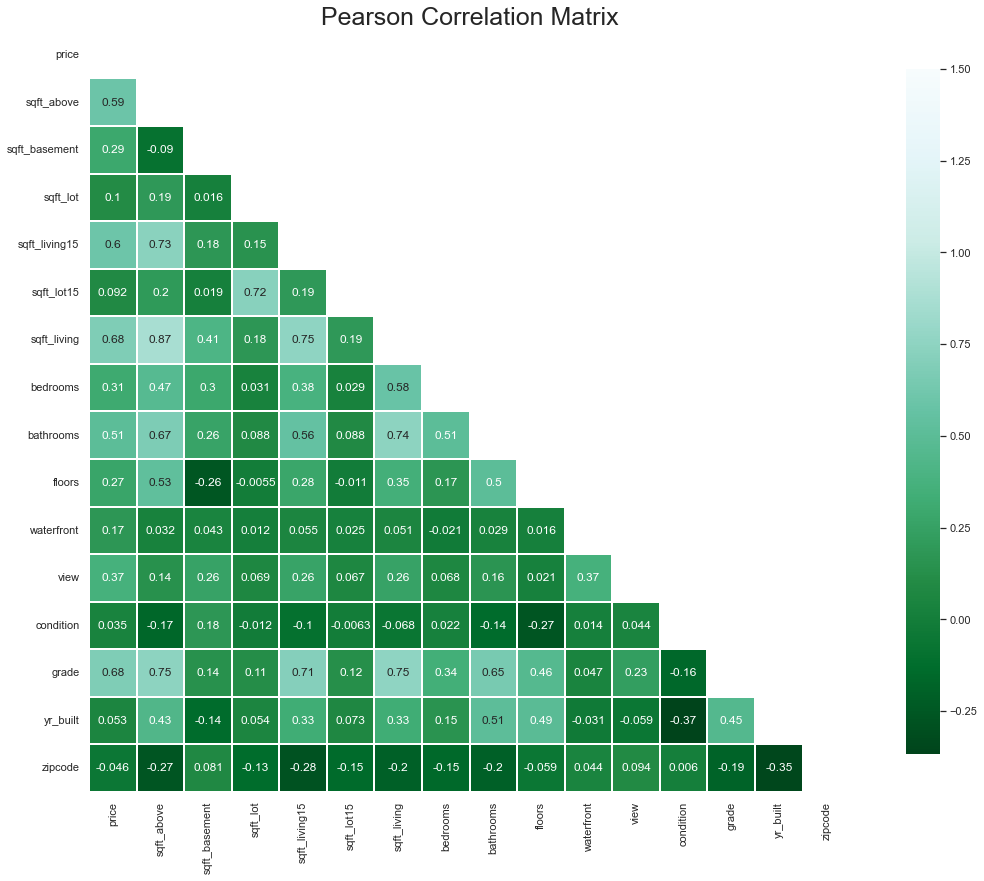

In [33]:
mask = np.zeros_like(df[features].corr(), dtype=np.bool) 
mask[np.triu_indices_from(mask)] = True 

f, ax = plt.subplots(figsize=(20, 14))
plt.title('Pearson Correlation Matrix',fontsize=25)

sns.heatmap(df[features].corr(),linewidths=0.2,vmax=1.5,square=True, cmap="BuGn_r",
            linecolor='w',annot=True,annot_kws={"size":12},mask=mask,cbar_kws={"shrink": .9});

 - sqft_living and sqft_above display a multicolinearity, having a Pearson correlation of 0.88. 
 - To a lesser extent, there was some multicollinearity between sqft_living and sqft_living15 (between the living space of the house in question and the 15 closest neighbors), as well as sqft_living and grade (0.77) and sqft_above and grade (0.76). 


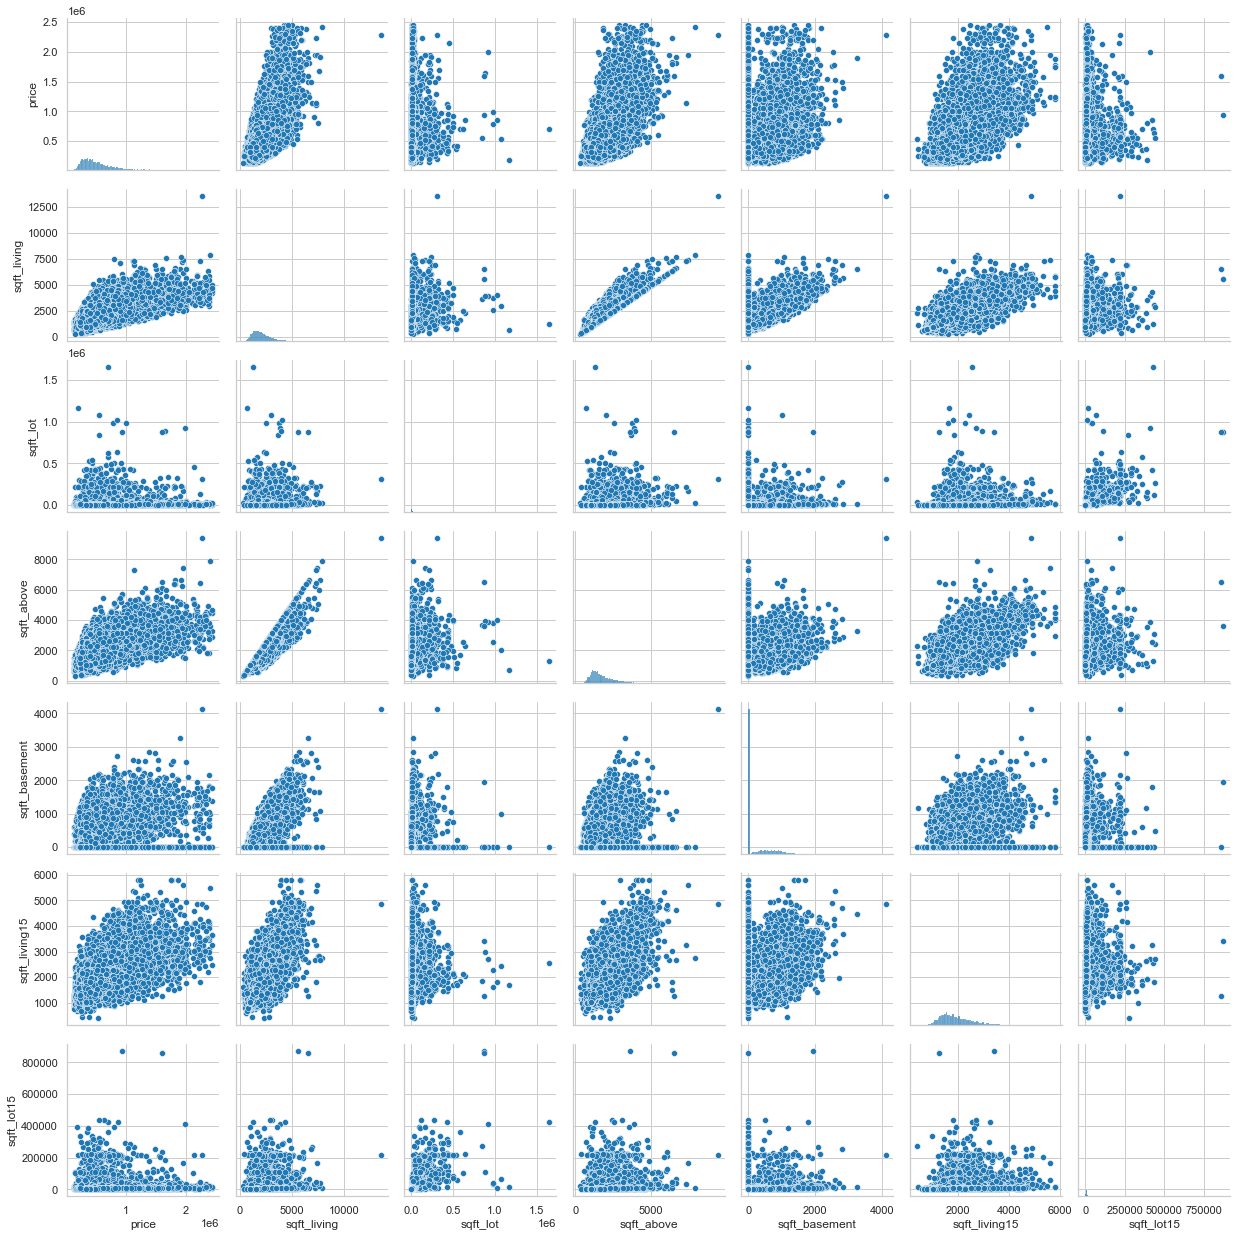

In [34]:
sns.pairplot(df[['price', 'sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement', 
                 'sqft_living15', 'sqft_lot15']])
plt.show()

sqft_lot and sqft_lot15 are not correlted linearly with price

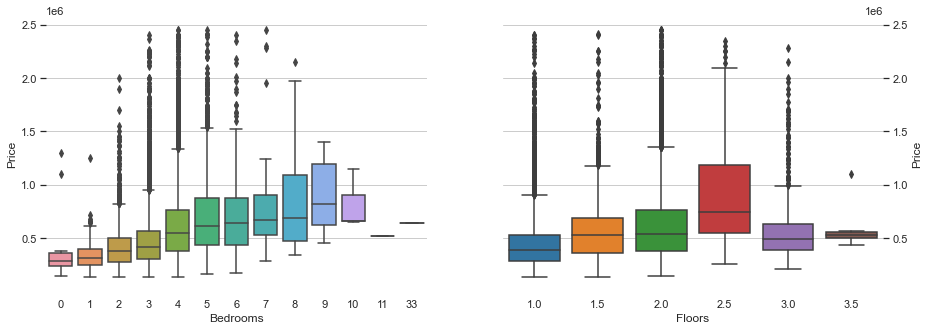

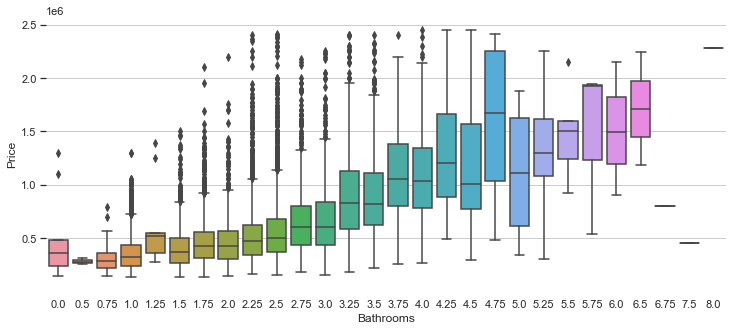

In [35]:
f, axes = plt.subplots(1, 2,figsize=(15,5))
sns.boxplot(x=df['bedrooms'],y = df['price'], ax=axes[0])
sns.boxplot(x=df['floors'],y = df['price'], ax=axes[1])
sns.despine(left=True, bottom=True)
axes[0].set(xlabel='Bedrooms', ylabel='Price')
axes[0].yaxis.tick_left()
axes[1].yaxis.set_label_position("right")
axes[1].yaxis.tick_right()
axes[1].set(xlabel='Floors', ylabel='Price')

f, axe = plt.subplots(1, 1,figsize=(12.18,5))
sns.despine(left=True, bottom=True)
sns.boxplot(x=df['bathrooms'],y=df['price'], ax=axe)
axe.yaxis.tick_left()
axe.set(xlabel='Bathrooms', ylabel='Price');

<AxesSubplot:xlabel='bedrooms', ylabel='count'>

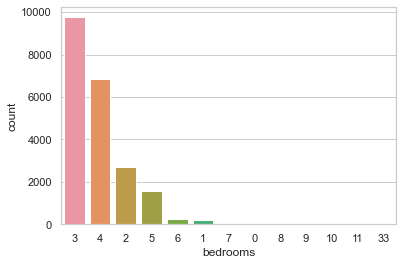

In [36]:
sns.countplot(df.bedrooms,order=df['bedrooms'].value_counts().index)

In [37]:
#limit dataset remove outliers
df = df.loc[df['bedrooms'] < 7.0]
df = df.loc[df['bathrooms'] > 1.0]
df = df.loc[df['floors'] < 3]
df = df.loc[df['sqft_basement'] < 2000]
df = df.loc[df['sqft_lot'] < 750000]

(array([7715., 7773., 1187.,  108.,   11.]),
 array([ 590., 2048., 3506., 4964., 6422., 7880.]),
 <BarContainer object of 5 artists>)

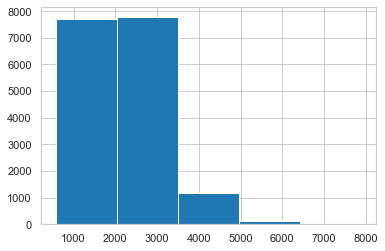

In [38]:
plt.hist('sqft_living',data=df,bins=5)

## Distribution plot and histograms

<AxesSubplot:xlabel='sqft_living', ylabel='Density'>

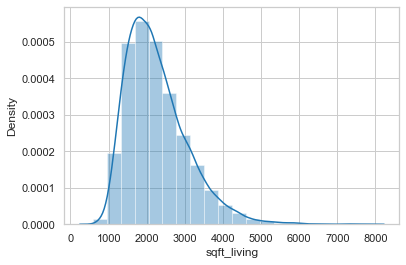

In [39]:
sns.distplot((df['sqft_living']), bins=20)

<AxesSubplot:xlabel='sqft_living15', ylabel='Density'>

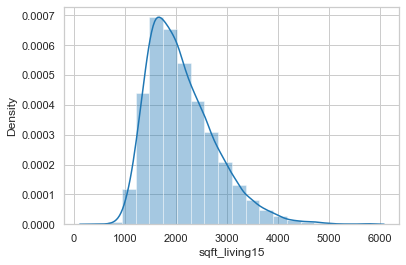

In [40]:
sns.distplot((df['sqft_living15']), bins=20)

<AxesSubplot:xlabel='yr_built', ylabel='Density'>

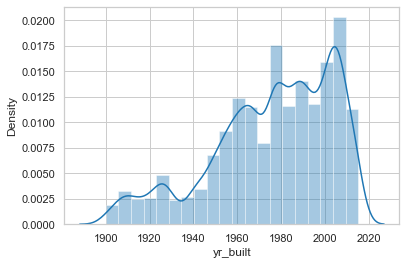

In [41]:
sns.distplot((df['yr_built']), bins=20)

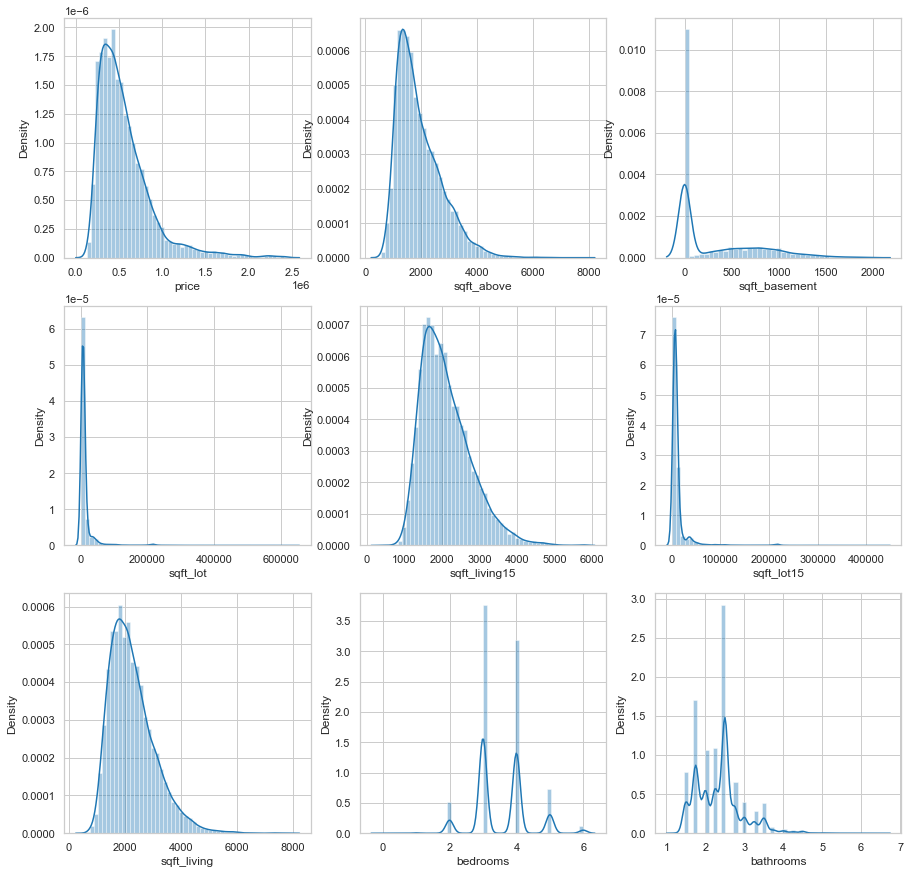

In [42]:
fig, axes = plt.subplots(ncols=3, nrows=3,figsize=(15,15))

for i, ax in zip(range(9), axes.flat):
    sns.distplot(df[features[i]], ax=ax, kde=True)
plt.show()

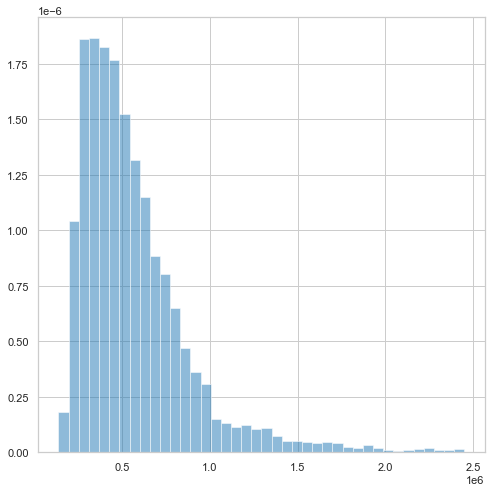

In [43]:
# histogram on price: 
price_hist = plt.figure(num=1, figsize=(8,8))
ax = price_hist.add_subplot(111)
ax.hist(df['price'], bins = 40, density = True, alpha = 0.5)
plt.show()


There is a upper ended tail to the normal distribution for price

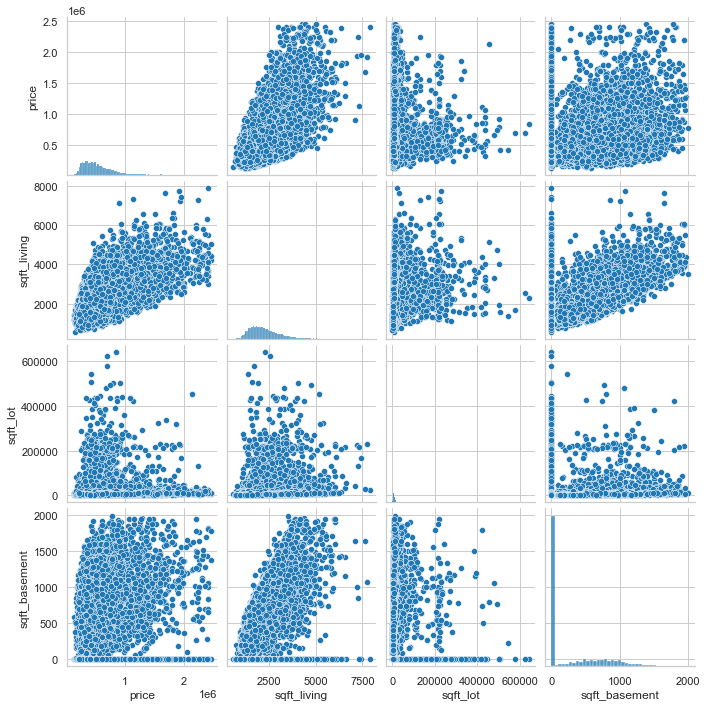

In [44]:
sns.pairplot(df[['price', 'sqft_living', 'sqft_lot', 'sqft_basement']])
plt.show()

## Data transformations

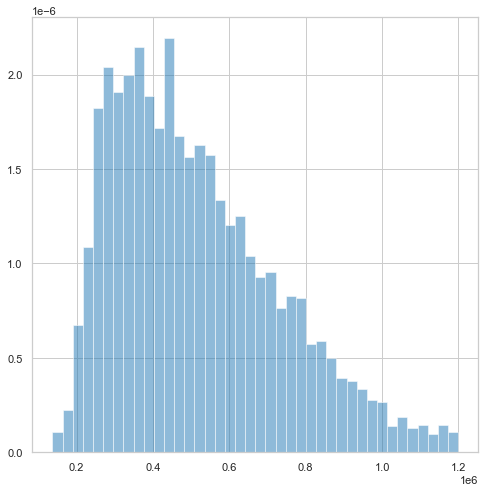

In [45]:
df = df.loc[df['price'] > 100000]
df = df.loc[df['price'] < 1200000]
df.describe() 
#Repeat histogram on price: 
price_hist = plt.figure(num=1, figsize=(8,8))
ax = price_hist.add_subplot(111)
ax.hist(df['price'], bins = 40, density = True, alpha = 0.5)
plt.show()

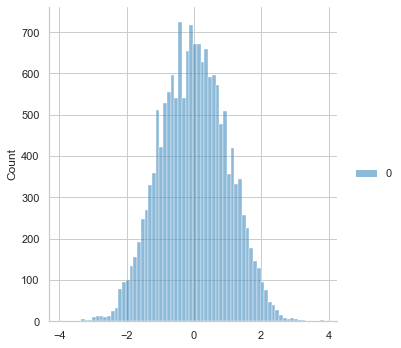

In [46]:
pt = PowerTransformer()
sqft_living_transformed=pt.fit_transform(df['sqft_living'].to_numpy().reshape(-1,1))
sns.displot(sqft_living_transformed)

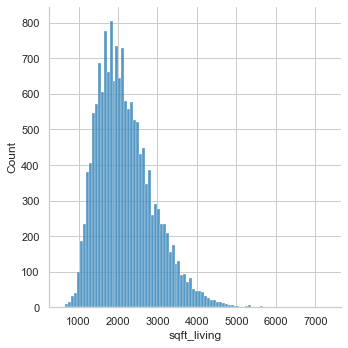

In [47]:
sns.displot(df['sqft_living'])

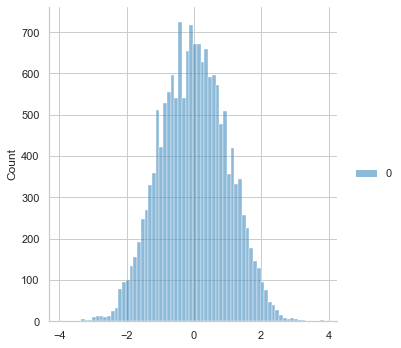

In [48]:
sqft_living15_transformed=pt.fit_transform(df['sqft_living15'].to_numpy().reshape(-1,1))
sns.displot(sqft_living_transformed)

In [49]:
df['sqft_living_transformed'] = sqft_living_transformed

In [50]:
type(df['sqft_living_transformed'])

pandas.core.series.Series

In [51]:
df['log_sqft_lot'] = df['sqft_lot'].copy()
df['log_sqft_lot'] = df['log_sqft_lot'].map(lambda x: np.log(x))

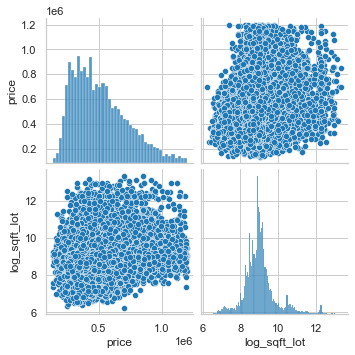

In [52]:
sns.pairplot(df[['price', 'log_sqft_lot']])
plt.show()

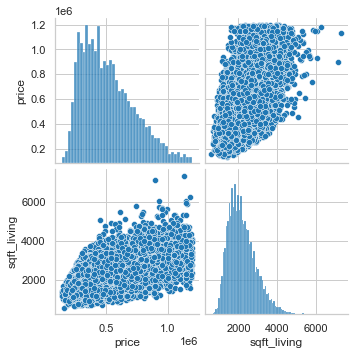

In [53]:
sns.pairplot(df[['price', 'sqft_living']])
plt.show()

In [54]:
#df['sqft_basement_t'] = df['sqft_basement'].copy()
#df['sqft_basement_t'] = df['sqft_basement_t'].map(lambda x: x < 2000)

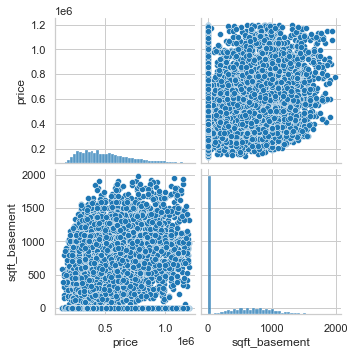

In [55]:
sns.pairplot(df[['price', 'sqft_basement']])
plt.show()

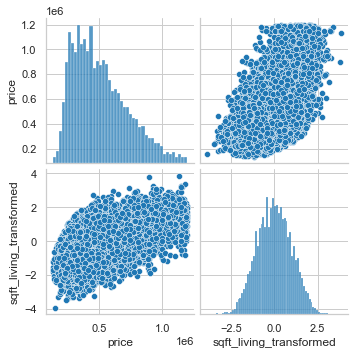

In [56]:
sns.pairplot(df[['price', 'sqft_living_transformed']])
plt.show()

In [57]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
df[['price', 'bedrooms', 'sqft_living_transformed', 'log_sqft_lot', 'floors',
       'condition', 'sqft_basement', 'yr_built', 'waterfront']].corr()



,price,bedrooms,sqft_living_transformed,log_sqft_lot,floors,condition,sqft_basement,yr_built,waterfront
price,1.000000,0.232153,0.586914,0.136165,0.222157,0.050034,0.186562,-0.058786,0.069368
bedrooms,0.232153,1.000000,0.528929,0.154332,0.102059,0.020108,0.222469,0.015449,-0.031887
sqft_living_transformed,0.586914,0.528929,1.000000,0.340832,0.328462,-0.088812,0.284702,0.214562,0.014026
log_sqft_lot,0.136165,0.154332,0.340832,1.000000,-0.173349,0.063021,0.035924,-0.020298,0.048285
floors,0.222157,0.102059,0.328462,-0.173349,1.000000,-0.313559,-0.415635,0.457389,0.003262
condition,0.050034,0.020108,-0.088812,0.063021,-0.313559,1.000000,0.217133,-0.442263,0.006909
sqft_basement,0.186562,0.222469,0.284702,0.035924,-0.415635,0.217133,1.000000,-0.293638,0.018969
yr_built,-0.058786,0.015449,0.214562,-0.020298,0.457389,-0.442263,-0.293638,1.000000,-0.046908
waterfront,0.069368,-0.031887,0.014026,0.048285,0.003262,0.006909,0.018969,-0.046908,1.000000


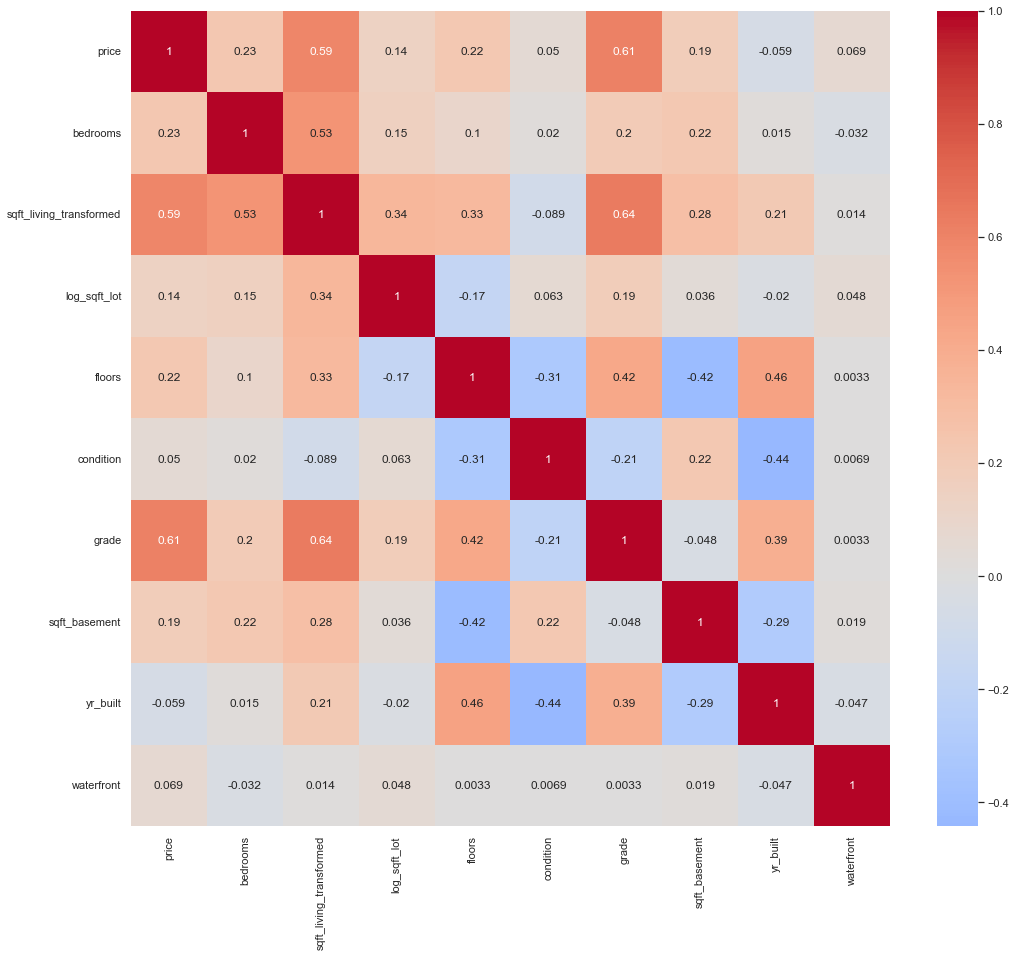

In [58]:
plt.subplots(figsize=(17,15))
sns.heatmap(df[['price', 'bedrooms', 'sqft_living_transformed', 'log_sqft_lot', 'floors',
       'condition', 'grade', 'sqft_basement', 'yr_built', 'waterfront']].corr(), 
        center=0,annot=True, cmap='coolwarm')
plt.show()

## Modeling

In [59]:
zipcode_dummies = pd.get_dummies(df['zipcode'], prefix='zip', drop_first=True)

df = df.drop(['zipcode'], axis=1)
df = pd.concat([df, zipcode_dummies], axis=1)


In [60]:
y = df.price
features = df.drop(['price','sqft_living','sqft_living15', 'sqft_lot15', 'sqft_lot', 'sqft_above'], axis = 1)
X = features
X

,bedrooms,bathrooms,floors,waterfront,view,condition,grade,sqft_basement,yr_built,sqft_living_transformed,log_sqft_lot,zip_98002,zip_98003,zip_98004,zip_98005,zip_98006,zip_98007,zip_98008,zip_98010,zip_98011,zip_98014,zip_98019,zip_98022,zip_98023,zip_98024,zip_98027,zip_98028,zip_98029,zip_98030,zip_98031,zip_98032,zip_98033,zip_98034,zip_98038,zip_98039,zip_98040,zip_98042,zip_98045,zip_98052,zip_98053,zip_98055,zip_98056,zip_98058,zip_98059,zip_98065,zip_98070,zip_98072,zip_98074,zip_98075,zip_98077,zip_98092,zip_98102,zip_98103,zip_98105,zip_98106,zip_98107,zip_98108,zip_98109,zip_98112,zip_98115,zip_98116,zip_98117,zip_98118,zip_98119,zip_98122,zip_98125,zip_98126,zip_98133,zip_98136,zip_98144,zip_98146,zip_98148,zip_98155,zip_98166,zip_98168,zip_98177,zip_98178,zip_98188,zip_98198,zip_98199
1,3,2.25,2.0,0,0,3,7,400,1951,0.659439,8.887653,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,3.00,1.0,0,0,5,7,910,1965,-0.177257,8.517193,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,3,2.00,1.0,0,0,3,8,0,1987,-0.654331,8.997147,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,3,2.25,2.0,0,0,3,7,0,1995,-0.590472,8.827468,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,3,1.50,1.0,0,0,3,7,0,1963,-2.084171,9.181015,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21605,4,2.50,2.0,0,0,3,9,0,2014,0.598853,8.703341,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
21606,4,3.50,2.0,0,0,3,9,910,2009,1.618960,8.881836,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
21607,3,2.50,2.0,0,0,3,8,130,2008,-1.425857,7.165493,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
21609,4,2.50,2.0,0,0,3,8,0,2014,0.330379,8.667852,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [61]:
formula = 'y ~ bedrooms + bathrooms + floors + waterfront + view + condition  + grade+ sqft_basement  \
            + yr_built  + sqft_living_transformed +  log_sqft_lot + zip_98002 \
            + zip_98003 + zip_98004 + zip_98005 + zip_98006 + zip_98007 + zip_98008 \
            + zip_98010 + zip_98011 + zip_98014 + zip_98019 + zip_98022 + zip_98023 \
            + zip_98024 + zip_98027 + zip_98028 + zip_98029 + zip_98030 + zip_98031 \
            + zip_98032 + zip_98033 + zip_98034 + zip_98038 + zip_98039 + zip_98040 \
            + zip_98042 + zip_98045 + zip_98052 + zip_98053 + zip_98055 + zip_98056 \
            + zip_98058 + zip_98059 + zip_98065 + zip_98070 + zip_98072 + zip_98074 \
            + zip_98075 + zip_98077 + zip_98092 + zip_98102 + zip_98103 + zip_98105 \
            + zip_98106 + zip_98107 + zip_98108 + zip_98109 + zip_98112 + zip_98115 \
            + zip_98116 + zip_98117 + zip_98118 + zip_98119 + zip_98122 + zip_98125 \
            + zip_98126 + zip_98133 + zip_98136 + zip_98144 + zip_98146 + zip_98148 \
            + zip_98155 + zip_98166 + zip_98168 + zip_98177 + zip_98178 + zip_98188 \
            + zip_98198 + zip_98199'
smodel = ols(formula = formula, data = features).fit()
smodel.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     991.1
Date:                Wed, 01 Feb 2023   Prob (F-statistic):               0.00
Time:                        23:20:13   Log-Likelihood:            -2.0455e+05
No. Observations:               15974   AIC:                         4.093e+05
Df Residuals:                   15893   BIC:                         4.099e+05
Df Model:                          80                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                2.019e+05   8.57e+04      2.356      0.018    3.39e+04     3.7e+05
bedrooms                -5528.8079   1098.855     -5.031      0.000   -7682.687   -3374.928
bathrooms                  2.7e+04   1879.301     14.365      0.000    2.33e+04    3.07e+04
floors                  -7450.7664   2301.899     -3.237      0.001    -1.2e+04   -2938.784
waterfront               1.873e+05   1.37e+04     13.632      0.000     1.6e+05    2.14e+05
view                     3.556e+04   1158.456     30.699      0.000    3.33e+04    3.78e+04
condition                2.127e+04   1265.508     16.804      0.000    1.88e+04    2.37e+04
grade                    5.838e+04   1129.284     51.699      0.000    5.62e+04    6.06e+04
sqft_basement             -40.5118      2.406    -16.841      0.000     -45.227     -35.797
yr_built                 -328.4606     42.080     -7.806      0.000    -410.943    -245.978
sqft_living_transformed  7.699e+04   1402.423     54.897      0.000    7.42e+04    7.97e+04
log_sqft_lot             2.508e+04   1154.277     21.729      0.000    2.28e+04    2.73e+04
zip_98002                1.362e+04   9046.250      1.505      0.132   -4115.270    3.13e+04
zip_98003               -2063.0224   7744.127     -0.266      0.790   -1.72e+04    1.31e+04
zip_98004                5.357e+05   9289.032     57.673      0.000    5.18e+05    5.54e+05
zip_98005                 3.43e+05   8912.721     38.485      0.000    3.26e+05     3.6e+05
zip_98006                2.929e+05   6916.632     42.347      0.000    2.79e+05    3.06e+05
zip_98007                2.659e+05   9503.806     27.983      0.000    2.47e+05    2.85e+05
zip_98008                2.553e+05   7737.761     32.996      0.000     2.4e+05     2.7e+05
zip_98010                7.436e+04   1.11e+04      6.670      0.000    5.25e+04    9.62e+04
zip_98011                1.567e+05   8280.929     18.927      0.000    1.41e+05    1.73e+05
zip_98014                9.645e+04   1.08e+04      8.891      0.000    7.52e+04    1.18e+05
zip_98019                1.067e+05   8451.547     12.628      0.000    9.02e+04    1.23e+05
zip_98022               -6733.5622   8533.843     -0.789      0.430   -2.35e+04    9993.736
zip_98023               -2.372e+04   6714.005     -3.533      0.000   -3.69e+04   -1.06e+04
zip_98024                1.477e+05   1.31e+04     11.283      0.000    1.22e+05    1.73e+05
zip_98027                2.055e+05   6994.683     29.379      0.000    1.92e+05    2.19e+05
zip_98028                1.467e+05   7619.531     19.254      0.000    1.32e+05    1.62e+05
zip_98029                2.384e+05   7264.132     32.817      0.000    2.24e+05    2.53e+05
zip_98030                8157.2502   7766.417      1.050      0.294   -7065.807    2.34e+04
zip_98031                1.569e+04   7585.824  

In [62]:
#display adjusted R-squared
print(smodel.rsquared_adj)

0.8321885624161998


### Modeling test train split

In [63]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.30,random_state=312)

In [64]:
# Scale indepedenent variable
# Standardize features by removing the mean and scaling to unit variance.
std_scaler     = StandardScaler().fit(X_train)
X_train_scaled = std_scaler.transform(X_train)
X_test_scaled  = std_scaler.transform(X_test) # use the same parameters from the training set [same scaling]

In [65]:
print(X_train_scaled.mean(axis=0), " \n", X_train_scaled.std(axis=0))



[-2.68177296e-16 -2.46411721e-16 -2.35767244e-16 -6.35491222e-18
  6.67265784e-17  3.17745611e-17  3.63500979e-16 -2.03357191e-17
  9.48470649e-16  1.71582630e-17  1.79510383e-15  4.03536926e-17
  2.09712103e-17  3.68584909e-17  5.84651925e-17  3.68584909e-17
 -3.11390699e-17  2.41486665e-17  1.04856052e-17 -1.46162981e-17
 -5.71942100e-18 -4.06714382e-17 -6.10071573e-17 -2.35131752e-17
 -5.71942100e-18  2.06534647e-17  2.38309208e-17  2.03357191e-17
 -3.13773791e-17 -5.17925346e-17 -1.27098244e-17 -4.98860610e-17
 -7.30814906e-18 -2.85971050e-17 -4.44843856e-18  7.43524730e-17
  7.40347274e-17 -2.35131752e-17 -3.71762365e-17  3.05035787e-17
 -1.23920788e-17  3.68584909e-17  2.92325962e-17  2.46252849e-18
 -1.27098244e-17  5.08392978e-18  2.71672498e-17 -2.54196489e-18
 -4.13069295e-17 -3.81294733e-18 -1.39808069e-17 -6.99040345e-18
 -7.62589467e-18  1.04856052e-17  3.84472190e-17  3.68584909e-17
 -4.32134031e-17 -2.54196489e-18  3.17745611e-19  1.63638990e-17
  8.89687711e-18  2.41486

In [66]:
model = LinearRegression()           # model
model.fit(X_train_scaled, y_train)   # model train

LinearRegression()

In [67]:
model.coef_

array([-3.90654598e+03,  1.33334141e+04, -3.66030733e+03,  8.89381714e+03,
        2.40856215e+04,  1.46570755e+04,  5.75485133e+04, -1.61828229e+04,
       -7.46070225e+03,  7.68502437e+04,  2.23899156e+04,  2.10857911e+03,
        3.43620213e+01,  4.66270444e+04,  3.36391530e+04,  4.46072840e+04,
        2.41654843e+04,  3.17948177e+04,  6.02381174e+03,  1.74590634e+04,
        7.42686450e+03,  1.09292772e+04,  3.54118273e+02, -3.40540748e+03,
        9.94960275e+03,  3.07847071e+04,  1.83127194e+04,  3.37558663e+04,
        1.23585229e+03,  2.81153827e+03, -9.44941394e+02,  4.90738702e+04,
        3.35549781e+04,  1.04821466e+04,  9.96581406e+03,  4.64319059e+04,
        2.30549974e+03,  1.22030446e+04,  4.76033151e+04,  3.96878016e+04,
        5.38883530e+03,  1.61510745e+04,  6.84003788e+03,  1.97635777e+04,
        2.05345283e+04,  6.66349344e+03,  2.25498859e+04,  3.70929176e+04,
        3.74753487e+04,  2.07256620e+04, -2.00485189e+03,  2.80354160e+04,
        4.84225339e+04,  

In [68]:
y_pred       = model.predict(X_test_scaled)   # model prediction [test]
y_pred_train = model.predict(X_train_scaled)  # model prediction [train]

In [69]:
result = pd.DataFrame({"y_test":y_test,"y_pred":y_pred})

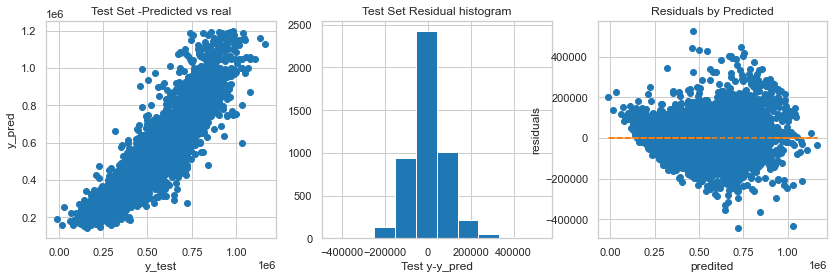

In [70]:

fig, ax = plt.subplots(1,3,figsize=(14,4))
ax[0].plot(y_pred, y_test, 'o')
ax[0].set_xlabel("y_test")
ax[0].set_ylabel("y_pred")
ax[0].set_title("Test Set -Predicted vs real")

# Get a histogram of the residuals ie: y - y_pred.  Homoscdasticity
# It resembles a normal distribution?
ax[1].hist(y_test - y_pred)
ax[1].set_xlabel("Test y-y_pred")
ax[1].set_title("Test Set Residual histogram")

ax[2].plot(y_pred,y_test - y_pred,"o")
ax[2].set_xlabel("predited")
ax[2].set_ylabel("residuals")
ax[2].set_title("Residuals by Predicted")
ax[2].plot(y_pred,np.zeros(len(y_pred)),linestyle='dashed')


<AxesSubplot:xlabel='y_pred', ylabel='y_test'>

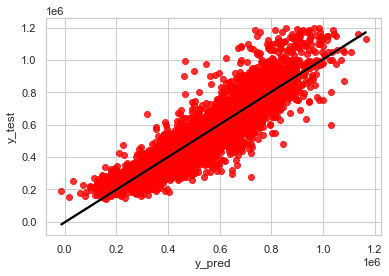

In [71]:
sns.regplot(x='y_pred',y='y_test', data=result, scatter_kws={"color": "red"}, line_kws={"color": "black"})

### Error metrics

In [72]:
print(mse(y_test,y_pred))
print(mae(y_test,y_pred))
print(mse(y_train,y_pred_train, squared = False))

7795467178.035529
64727.36458823206
88168.11142673226


In [73]:
R2=r2_score(y_test,y_pred)
R2

0.8323124393188954

In [74]:
Adj_R2= 1 - (1-R2)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
Adj_R2

0.829465451870999

#### Feature importance

In [75]:
features_importances = pd.DataFrame(data={
    'Attribute': X_train.columns,
    'Importance': abs(model.coef_)
})
features_importances = features_importances.sort_values(by='Importance', ascending=False)

In [76]:
features_importances

,Attribute,Importance
9,sqft_living_transformed,76850.243716
6,grade,57548.513269
59,zip_98115,55696.858154
61,zip_98117,49874.283095
31,zip_98033,49073.870169
52,zip_98103,48422.533861
38,zip_98052,47603.315113
79,zip_98199,46707.212963
13,zip_98004,46627.044388
35,zip_98040,46431.905854


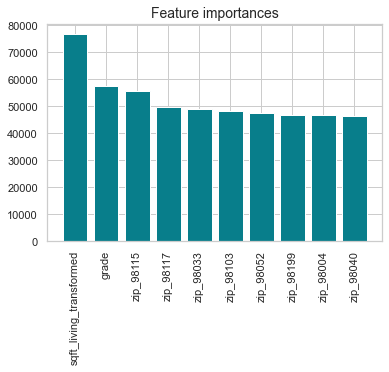

In [77]:
plt.bar(x=features_importances['Attribute'][0:10], height=features_importances['Importance'][0:10], color='#087E8B')
plt.title('Feature importances', size=14)
plt.xticks(rotation='vertical')
plt.show()

In [78]:
df.to_csv('kc_house_data_ext.csv')

In [79]:
grade_avg_price = df.groupby('grade')['grade','price'].agg('mean')

In [80]:
grade_avg_price

,grade,price
grade,,
4,4.0,355000.000000
5,5.0,273756.000000
6,6.0,336399.160745
7,7.0,407869.451042
8,8.0,529812.228582
9,9.0,693315.965044
10,10.0,825990.987229
11,11.0,973347.416149
12,12.0,975600.000000


<AxesSubplot:xlabel='grade', ylabel='price'>

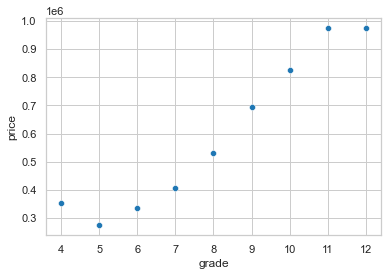

In [81]:

# Draw Seaborn Scatter Plot to find relationship between age and fare
sns.scatterplot(x = grade_avg_price['grade'], y = grade_avg_price['price'])

In [82]:
zip_avg_price = df.groupby('zipcode')['zipcode','price'].agg('mean')

KeyError: 'zipcode'

In [ ]:
zip_avg_price.sort_values(by=['price'], ascending=False)

In [ ]:

# Draw Seaborn Scatter Plot to find relationship between age and fare
sns.barplot(x = zip_avg_price['zipcode'], y = zip_avg_price['price'])

In [ ]:
sns.set_style('whitegrid')
sns.set_context('notebook')
sns.color_palette("bright")

f, ax = plt.subplots(figsize=(18, 12))
sns.despine(f, left=True, bottom=True)
sns.barplot(x="zipcode", y="price_sqft", data=df, ax=ax)
ax.set_title("Price Per Square Foot by Zip Code", fontsize=15,fontweight='bold')
ax.set_xlabel("Zip Code", fontsize=12,fontweight='bold')
ax.set_ylabel("Price per Square Foot of Living Space", fontsize=12,fontweight='bold')
plt.xticks(rotation=90)

plt.show()

In [ ]:
df[df['zip_98039']==1].mean()

In [ ]:

# Draw Seaborn Scatter Plot to find relationship between age and fare
sns.scatterplot(data=df, x = df['grade'], y = df['price'], hue='waterfront')

In [ ]:
df['price'].max()